

# Two Problems for Lab 3:


# Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dat = pd.read_csv("voice1.csv")
dat.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [66]:
## Drop Feature Columns X
X = dat.drop(columns=["label"])

## Set Up Target Variables y
y = dat["label"]

X = (X - X.mean())/X.std()


<AxesSubplot:>

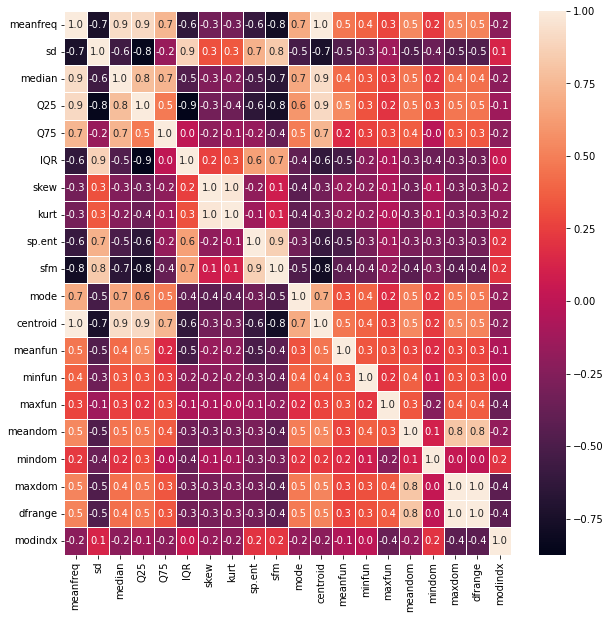

In [4]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dat.corr(),annot=True,linewidth=.5, fmt='.1f')

Text(0.5, 1.0, 'Correlation Difference Between male and female')

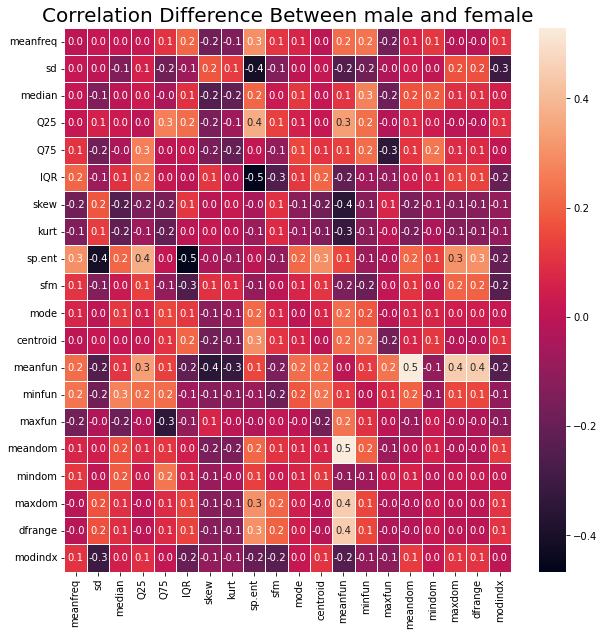

In [5]:
I_m = y=="male"
I_b = y=="female"

f,ax = plt.subplots(figsize=(10, 10))


sns.heatmap(X[I_m].corr() - X[I_b].corr(),annot=True,linewidth=.5, fmt='.1f')

ax.set_title("Correlation Difference Between male and female",fontsize = 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

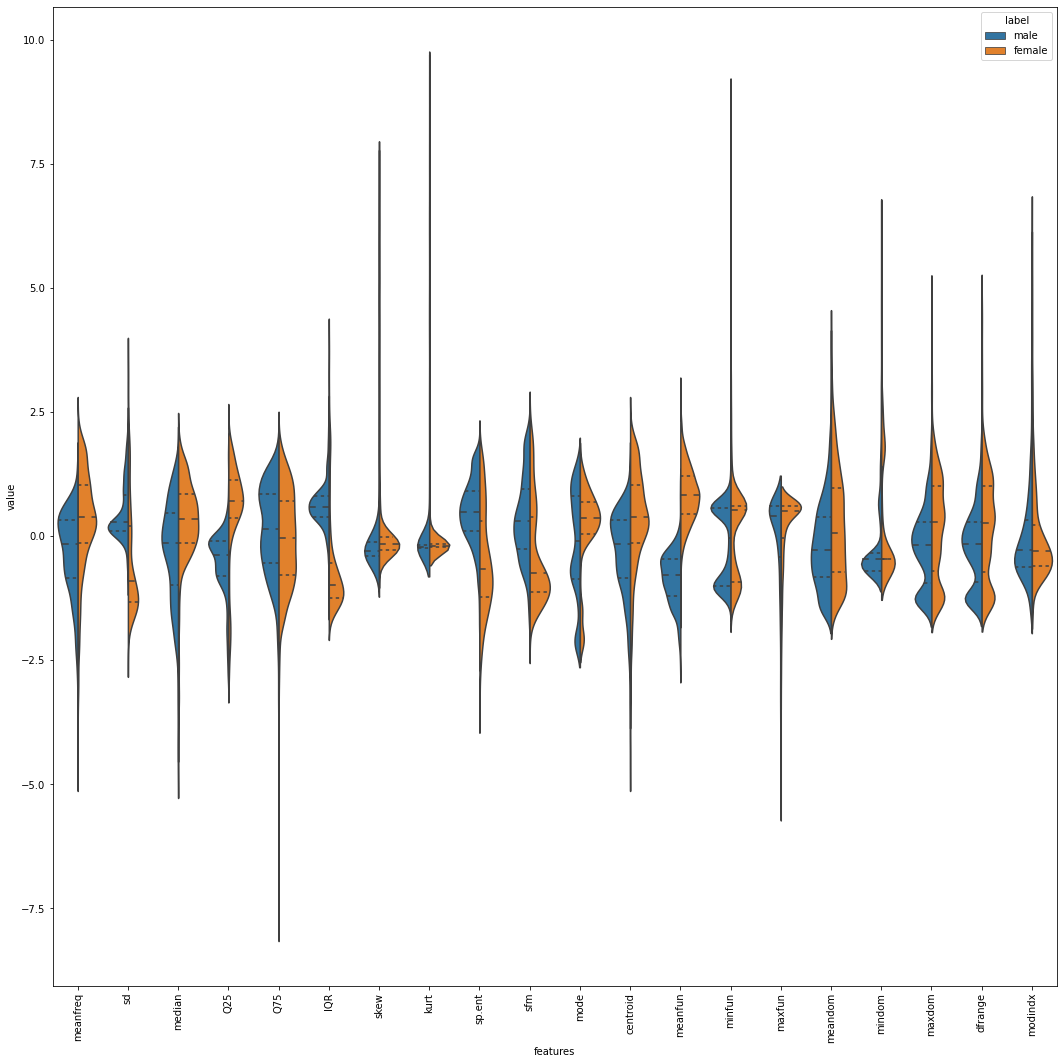

In [6]:
plt.figure(figsize=(18,18))

violin = pd.concat([y,X],axis=1)
violin = pd.melt(violin,id_vars="label",
                    var_name="features",
                    value_name='value')

sns.violinplot(x="features", y="value", hue="label", data=violin,split=True, inner="quart")

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'median'),
  Text(3, 0, 'Q25'),
  Text(4, 0, 'Q75'),
  Text(5, 0, 'IQR'),
  Text(6, 0, 'skew'),
  Text(7, 0, 'kurt'),
  Text(8, 0, 'sp.ent'),
  Text(9, 0, 'sfm'),
  Text(10, 0, 'mode'),
  Text(11, 0, 'centroid'),
  Text(12, 0, 'meanfun'),
  Text(13, 0, 'minfun'),
  Text(14, 0, 'maxfun'),
  Text(15, 0, 'meandom'),
  Text(16, 0, 'mindom'),
  Text(17, 0, 'maxdom'),
  Text(18, 0, 'dfrange'),
  Text(19, 0, 'modindx')])

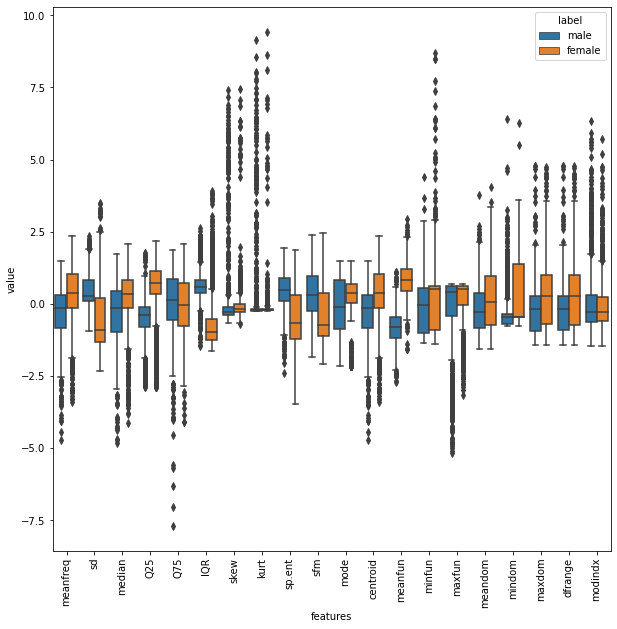

In [7]:
plt.figure(figsize=(10,10))

sns.boxplot(x="features", y="value", hue="label", data=violin)

plt.xticks(rotation=90)

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3163,1,0
3164,1,0
3165,1,0
3166,1,0


(-1.9081155923982005, 4.2025798818885)

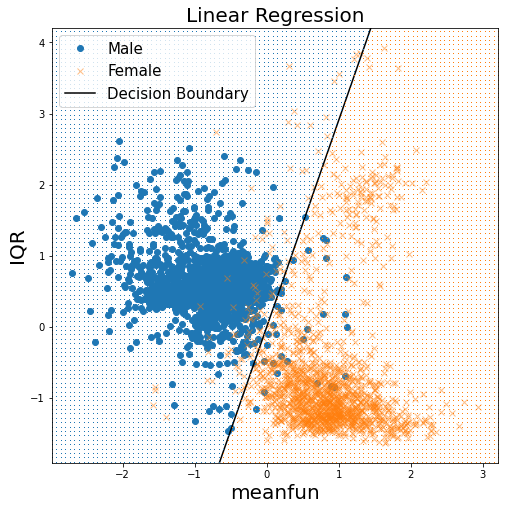

In [8]:
y_train = pd.get_dummies(y)
display(y_train)

from sklearn.linear_model import LinearRegression

X_train = X[['meanfun',"IQR"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

B0 = lr.intercept_
B = lr.coef_


f, ax = plt.subplots(figsize=(8,8))

I_m = y=="male"
I_f = y=="female"

X1 = X["meanfun"]
X2 = X["IQR"]

plt.plot(X1[I_m],X2[I_m],'o',label="Male")
plt.plot(X1[I_f],X2[I_f],'x',label="Female",alpha=.5)


## We want to make a nice clean line directly across the graph as it was before
## The best way to do this is to find the limits of the graph and plot using them 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")


## We also may also want to color in the side of the decicion boundry we're
## Labeling each point. One way to do this is using a mesh grid, and then using
## an indexon the equation from before

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("meanfun",fontsize=20)
plt.ylabel("IQR",fontsize=20)

plt.title("Linear Regression",fontsize=20)

plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

(-1.9081155923982005, 4.2025798818885)

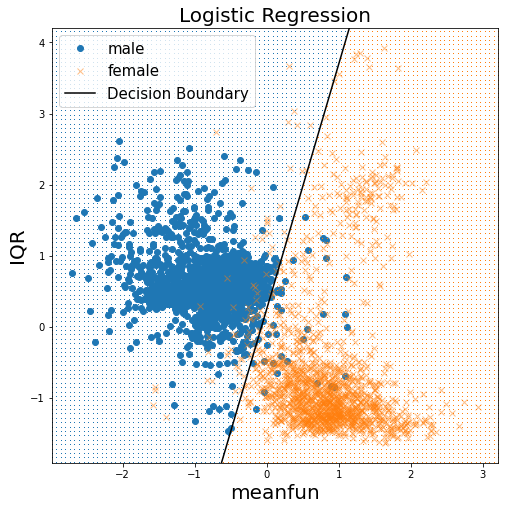

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y)

f, ax = plt.subplots(figsize=(8,8))

X1 = X["meanfun"]
X2 = X["IQR"]

plt.plot(X1[I_m],X2[I_m],'o',label="male")
plt.plot(X1[I_f],X2[I_f],'x',label="female",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = clf.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'male'
z2 = ZZ == 'female'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")


B0 = clf.intercept_
B = clf.coef_

u = np.linspace(xm,xM, 2)
v = -(u*(B[0,0]) + B0[0])/(B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")
 

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("meanfun",fontsize=20)
plt.ylabel("IQR",fontsize=20)
plt.title("Logistic Regression",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

(-1.9081155923982005, 4.2025798818885)

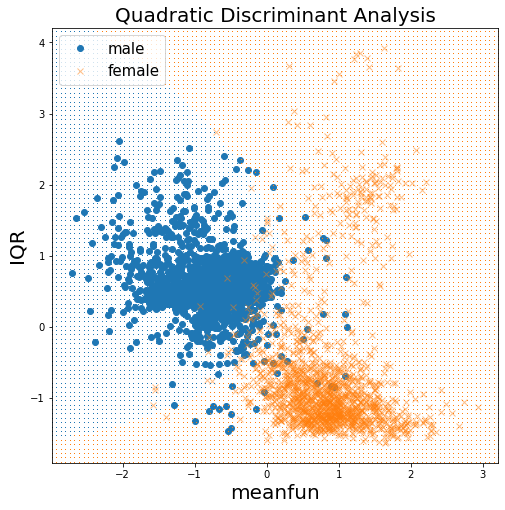

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y)

f, ax = plt.subplots(figsize=(8,8))

X1 = X["meanfun"]
X2 = X["IQR"]

plt.plot(X1[I_m],X2[I_m],'o',label="male")
plt.plot(X1[I_f],X2[I_f],'x',label="female",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'male'
z2 = ZZ == 'female'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("meanfun",fontsize=20)
plt.ylabel("IQR",fontsize=20)
plt.title("Quadratic Discriminant Analysis",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

(-1.9081155923982005, 4.2025798818885)

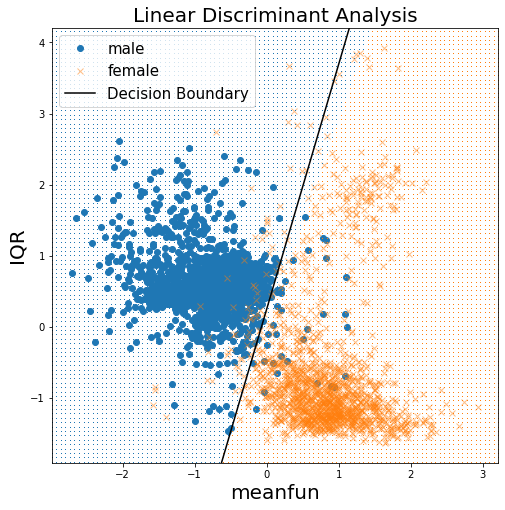

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y)


f, ax = plt.subplots(figsize=(8,8))

X1 = X["meanfun"]
X2 = X["IQR"]

plt.plot(X1[I_m],X2[I_m],'o',label="male")
plt.plot(X1[I_f],X2[I_f],'x',label="female",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = lda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'male'
z2 = ZZ == 'female'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("meanfun",fontsize=20)
plt.ylabel("IQR",fontsize=20)
plt.title("Linear Discriminant Analysis",fontsize=20)

plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)
print("Score for all features in LDA: %.3f"%lda.score(X,y))
lda.fit(X_train, y)
print("Score for two  indicative features in LDA: %.3f"%lda.score(X_train,y))

Score for all features in LDA: 0.968
Score for two highly indicative features in LDA: 0.961


In [71]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)
print("Score for all features in QDA: %.3f"%qda.score(X,y))

qda.fit(X_train, y)
print("Score for two indicative features in QDA: %.3f"%qda.score(X_train,y))


Score for all features in QDA: 0.956
Score for two indicative features in QDA: 0.966


In [63]:
X_train = X[['meanfun',"IQR"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Score for two  indicative features is %.3f"%(lr.score(X_train,y_train),))

X_tra = X
y = pd.get_dummies(y)
lr = LinearRegression()
lr.fit(X_tra,y_train)

print("Score for all features is %.3f"%(lr.score(X_tra,y_train),))

print("Using linear regression model we see all get little more accurate ")

Score for two  indicative features is 0.737
Score for all features is 0.805
Using linear regression model we see all get little more accurate 


In [69]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)
print("Score for all features in Logistic Regression: %.3f"%clf.score(X,y))
clf.fit(X_train,y)
print("Score for two features in Logistic Regression: %.3f"%clf.score(X_train,y))

Score for all features in Logistic Regression: 0.975
Score for two features in Logistic Regression: 0.966


# Problem 2: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [77]:
import os
os.getcwd()
#os.chdir('/Users/muskan')


'/Users/muskan'

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = '/Users/muskan/Downloads/MRI_Images'

labels = pd.read_csv('/Users/muskan/Downloads/MRI_Images/labels-1.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [79]:
file_dir = '/Users/muskan/Downloads/MRI_Images/'
print(file_dir)

/Users/muskan/Downloads/MRI_Images/


In [197]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(487,) (122,)


We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example, 

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 30976/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [223]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS,im_size])
yds_train = np.zeros([N_train*DS])
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]
        
print(Xds_train.shape)
N_train = y_train.shape[0]

(3896, 3872)


In [224]:
N_train*DS

3896

In [225]:
N_train

487

### Question 1:

Based on the code above, downsample the test data in the same way.  ()

In [226]:
 DS = 8             # Downsample rate, must be a multiple of 30976

N_test = y_test.shape[0]  # The length of the test data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_test= np.zeros([N_test*DS,im_size])
yds_test = np.zeros([N_test*DS])
    
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n]
        
print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976,)


In [227]:
print(X_train.shape)
print(X_test.shape)

(487, 30976)
(122, 30976)


In [228]:
X_train[0:1000].reshape(-1, 176*176).shape

(487, 30976)

### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?

In [229]:
Xds_train

array([[0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.40000001, 0.40000001, 0.40000001, ..., 0.40000001, 0.40000001,
        0.40000001],
       [0.42745098, 0.41470587, 0.43039215, ..., 0.40000001, 0.40000001,
        0.40000001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [230]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(Xds_train, yds_train.astype('str'))
print("LDA Score: %.3f"%lda.score(Xds_test,yds_test.astype('str')))

LDA Score: 0.926


In [233]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(Xds_train, yds_train.astype('str'))
print("QDA Score: %.3f"%qda.score(Xds_test,yds_test.astype('str')))

QDA Score: 0.880


In [234]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xds_train, yds_train.astype('str'))

print("Logistic Regression Score: %.3f"%clf.score(Xds_test,yds_test.astype('str')))

Logistic Regression Score: 0.939


In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr = LinearRegression()
lr.fit(Xds_train, yds_train.astype('str'))

print("Linear Regression Score: %.3f"%lr.score(Xds_test,yds_test.astype('str')))



Linear Regression Score: -0.496


In [238]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xds_train, pd.get_dummies(yds_train))
y_predict = np.argmax(lr.predict(Xds_test), axis=1)
y_t = np.argmax(np.matrix(pd.get_dummies(yds_test)), axis=1)
acc = accuracy_score(y_predict,y_t)
print("The accuracy score on the training data is %.3f"%(acc))

The accuracy score on the training data is 0.926
